In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('synthetic_dataset.csv')
df = df.set_index('Unnamed: 0')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.drop(['Outcome'],axis=1).columns] = scaler.fit_transform(df[df.drop(['Outcome'],axis=1).columns])
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)
# sns.pairplot(df)

In [21]:
class Model:
    y = []
    X = []
    w = []
    epochs = 0
    alpha = 0.0001
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.features = X.shape[1]+1
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)

In [22]:
myModel = Model(X_train,y_train,500)
model = LinearRegression()
myModel.fit()
model.fit(X_train,y_train)

LinearRegression()

sklearn: 0.41461568611102434 myModel: 0.4147124968514467


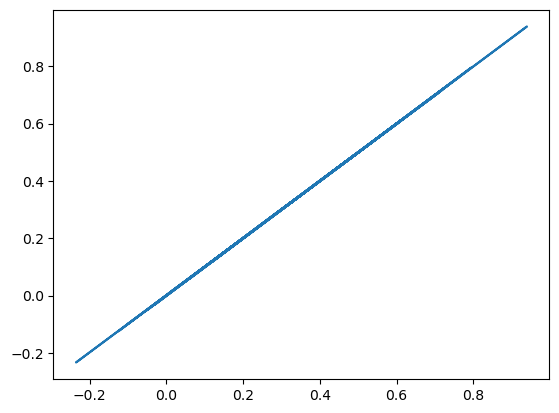

In [27]:
myPredictions = myModel.predict(X_test)
predictions = model.predict(X_test)
plt.plot(predictions,myPredictions)
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, predictions))} myModel: {np.sqrt(mean_squared_error(y_test, myPredictions))}")

In [8]:
def discriminant(x):
    if x<0.5:
        return 0
    return 1

In [24]:
myPredictions

array([ 0.06746556,  0.12914389,  0.25960698,  0.31355957,  0.1947819 ,
        0.42057293,  0.50844102,  0.32646495,  0.33374444,  0.33269761,
        0.54371207,  0.07581835,  0.52876973,  0.05933594,  0.09307362,
        0.73287999,  0.20986243,  0.16499109,  0.08147895,  0.66056715,
        0.66159166,  0.24166363,  0.41499866,  0.13719125,  0.20615113,
        0.00761895,  0.08664778,  0.12149024,  0.2805608 ,  0.4556379 ,
        0.70978372,  0.50313703,  0.48843523,  0.1997883 ,  0.01046912,
        0.33360071,  0.20408974,  0.33463813,  0.58723269,  0.22121652,
        0.2301955 ,  0.09129642,  0.10252485,  0.15124353,  0.25668299,
        0.53119492,  0.14200695,  0.08124327,  0.70049537,  0.51602161,
        0.4078787 ,  0.49726322, -0.05119437,  0.5455937 ,  0.63212261,
        0.04586685,  0.73284911,  0.47960243,  0.44476717,  0.56753805,
        0.6953387 ,  0.45299885,  0.59330318, -0.03417507,  0.60737654,
        0.55806517,  0.2659533 ,  0.48130075,  0.12112245,  0.61

In [12]:
vectorized_discriminant = np.vectorize(discriminant)
rounded_predictions = vectorized_discriminant(predictions)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [14]:
print(classification_report(y_test, rounded_predictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.79      0.89      0.84        99
     class 1       0.72      0.55      0.62        51

    accuracy                           0.77       150
   macro avg       0.76      0.72      0.73       150
weighted avg       0.77      0.77      0.76       150



In [25]:
rounded_mypredictions = vectorized_discriminant(predictions)
rounded_mypredictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [26]:
print(classification_report(y_test, rounded_mypredictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.79      0.89      0.84        99
     class 1       0.72      0.55      0.62        51

    accuracy                           0.77       150
   macro avg       0.76      0.72      0.73       150
weighted avg       0.77      0.77      0.76       150

